<a href="https://colab.research.google.com/github/aleksejalex/DYNR1cv/blob/main/DYNR1cv_01_BayesNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DYNR1cv - Bayesian nets.

Prepared by: *Aleksej Gaj* ([email](mailto:aleksejalex@gmail.com))

This material was inspired by the documentation of `bnlearn` library: [here](https://erdogant.github.io/bnlearn/pages/html/Examples.html#parameter-learning)


## installing library `bnlearn`

In [1]:
%%capture
%pip install bnlearn

In [2]:
%%capture
%pip install d3blocks

## imports

In [3]:
import bnlearn as bn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## `sprinkler` example

**Setup:** imagine we have data observed and some prior/expert knowledge about the process (relation between nodes).

**Aim:** to create Directed Acyclic Graph (DAG) on the expert knowledge and learn the conditional proability distributions (CPDs) from data.

Code below shows how to:
 - import data
 - define graph (which reflects prior knowledge about process)
 - compute/update probabilities using data
 - plot the graph/sheme
 - make an inference (i.e. to predict)

In [4]:
df = bn.import_example('sprinkler')
df.head(4)

,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1


This is how dataset looks like:

In [5]:
df.describe(include='all')

,Cloudy,Sprinkler,Rain,Wet_Grass
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.512000,0.309000,0.515000,0.653000
std,0.500106,0.462312,0.500025,0.476254
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Define the network structure. This can be based on expert knowledge.

In [6]:
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]

Make the actual Bayesian DAG

In [7]:
DAG = bn.make_DAG(edges)
# [BNLEARN] Bayesian DAG created.

[bnlearn] >bayes DAG created.


In [8]:
# Print the CPDs
CPDs = bn.print_CPD(DAG)

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.


Plot the DAG

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


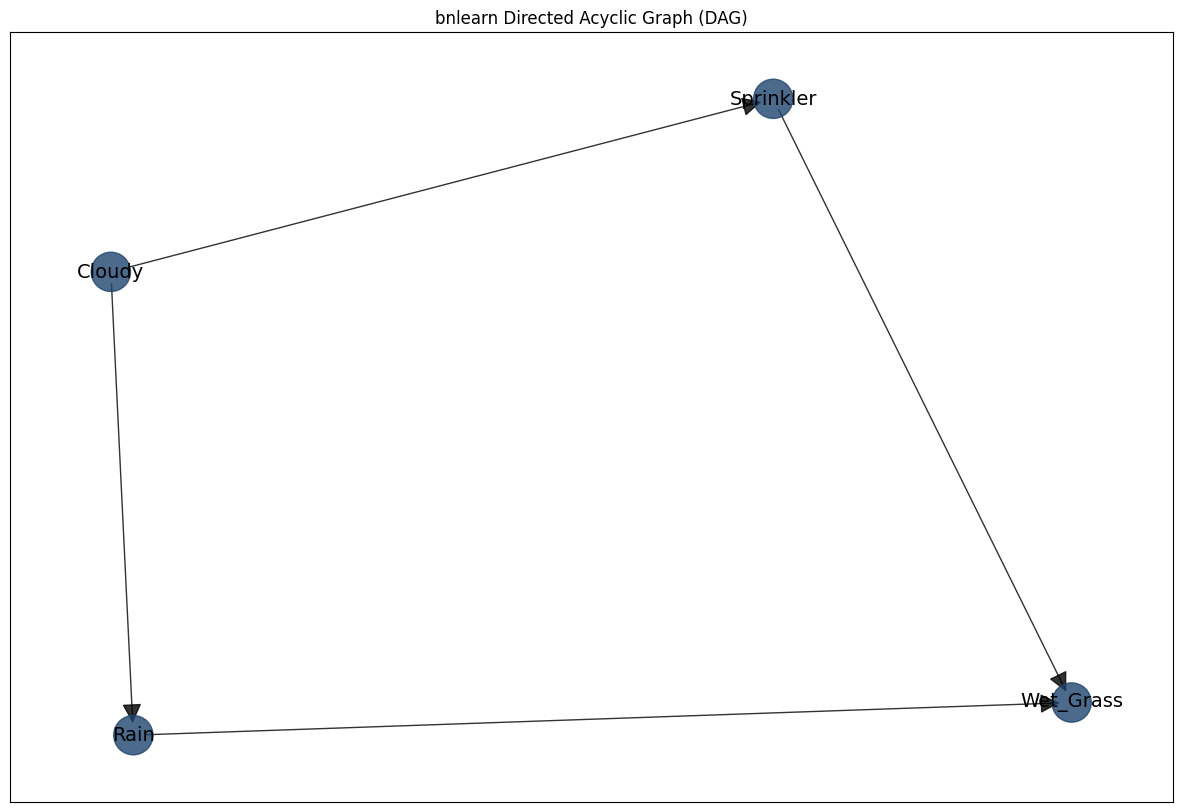

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Cloudy': array([-0.74761361,  0.51019224]),
  'Sprinkler': array([0.45605912, 1.        ]),
  'Rain': array([-0.706824  , -0.80132555]),
  'Wet_Grass': array([ 0.99837849, -0.70886669])},
 'G': <networkx.classes.digraph.DiGraph at 0x7ded47affac0>,
 'node_properties': {'Cloudy': {'node_color': '#1f456e', 'node_size': 800},
  'Sprinkler': {'node_color': '#1f456e', 'node_size': 800},
  'Rain': {'node_color': '#1f456e', 'node_size': 800},
  'Wet_Grass': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Cloudy', 'Sprinkler'): {'color': '#000000',
   'weight': 1},
  ('Cloudy', 'Rain'): {'color': '#000000', 'weight': 1},
  ('Sprinkler', 'Wet_Grass'): {'color': '#000000', 'weight': 1},
  ('Rain', 'Wet_Grass'): {'color': '#000000', 'weight': 1}}}

In [9]:
bn.plot(model=DAG, interactive=False)

Parameter learning on the user-defined DAG and input data using maximumlikelihood.

In [10]:
DAG = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.488 |
+-----------+-------+
| Cloudy(1) | 0.512 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)  |
+--------------+--------------------+------------+
| Sprinkler(0) | 0.4610655737704918 | 0.91015625 |
+--------------+--------------------+------------+
| Sprinkler(1) | 0.5389344262295082 | 0.08984375 |
+--------------+--------------------+------------+
[bnlearn] >CPD of Rain:
+---------+---------------------+-------------+
| Cloudy  | Cloudy(0)           | Cloudy(1)   |
+---------+---------------------+-------------+
| Rain(0) | 0.8073770491803278  | 0.177734375 |
+---------+---------------------+-------------+
| Rain(1) | 0.19262295081967212 | 0.822265625 |
+---------+---------------------+-------------+
[bnlearn] >CPD of Wet_Grass:
+----------

In [11]:
DAG

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x7ded47affa30>,
 'adjmat': target     Cloudy  Sprinkler   Rain  Wet_Grass
 source                                        
 Cloudy      False       True   True      False
 Sprinkler   False      False  False       True
 Rain        False      False  False       True
 Wet_Grass   False      False  False      False,
 'config': {'verbose': 3, 'method': 'maximumlikelihood', 'n_jobs': -1},
 'model_edges': [('Cloudy', 'Sprinkler'),
  ('Cloudy', 'Rain'),
  ('Sprinkler', 'Wet_Grass'),
  ('Rain', 'Wet_Grass')],
 'structure_scores': {'k2': -1952.7499005180107,
  'bic': -1953.219110059786,
  'bdeu': -1954.4304910940116,
  'bds': -1961.361962899611},
 'independence_test': None}

Lets print the learned CPDs:

In [12]:
CPDs = bn.print_CPD(DAG)

[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+----------+-------+
|    |   Cloudy |     p |
+====+==========+=======+
|  0 |        0 | 0.488 |
+----+----------+-------+
|  1 |        1 | 0.512 |
+----+----------+-------+
CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.488 |
+-----------+-------+
| Cloudy(1) | 0.512 |
+-----------+-------+
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+-----------+
|    |   Sprinkler |   Cloudy |         p |
+====+=============+==========+===========+
|  0 |           0 |        0 | 0.461066  |
+----+-------------+----------+-----------+
|  1 |           0 |        1 | 0.910156  |
+----+-------------+----------+-----------+
|  2 |           1 |        0 | 0.538934  |
+----+-------------+----------+-----------+
|  3 |           1 |        1 | 0.0898438 |
+----+-------------+----------+-----------+
CPD

Lets make an inference:

In [13]:
q1 = bn.inference.fit(DAG, variables=['Wet_Grass'], evidence={'Rain':1, 'Sprinkler':0, 'Cloudy':1})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+
|    |   Wet_Grass |        p |
+====+=============+==========+
|  0 |           0 | 0.113953 |
+----+-------------+----------+
|  1 |           1 | 0.886047 |
+----+-------------+----------+
